<h1 style='color:lightblue'>Røyker folk mindre idag?</h1>

<p style='font-size:17px'>Jeg bruker datasettet <em><strong>05307: Dagligrøykere og av-og-til-røykere, etter kjønn og alder (prosent) 1973 - 2022.</strong></em></p>

<p style='font-size:15px'>Spørregruppen består av ca. 6000 personer hvert år og er ment å være et representativt utvalg.</p>

<p>Jeg har market at tabellen skal inneholde:</p>
<ol>
<li> Statistikkvariabel </li>
    <ul>
        <li>Andel dagligrøykere</li>
    </ul>
<li> År</li>
    <ul>
        <li>1973 - 2022</li>
    </ul>
<li> Kjønn</li>
    <ul>
        <li>Begge kjønn</li>
        <li>Menn</li>
        <li>Kvinner</li>
    </ul>
</ol>

<img src='./bilder/bildeEn.png' width='27%'>
<img src='./bilder/bildeTo.png' width='27%'>
<img src='./bilder/bildeTre.png' width='27%'>




<p>Du kan laste den datasettet <a href='https://www.ssb.no/statbank/table/05307/'>HER</a></p>

<h2>La oss begynne</h2>

-----------

Jeg har lastet ned et datasett fra ssb.no som skal vise hvor stor andel av folk er dagligrøykere for hvert år.

La oss presentere det i et linjediagram siden vi skal vise forskjellen på data gjennom tid.

> <p> Vi begynner først med å importere pandas for å lese gjennom, vaske og sette overskriften på csv dataen vi har lastet ned fra ssb.no.</p>
>
> <p> Vi importerer matplotlib for å plotte dataen</p>

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.pyplot import style
%matplotlib inline

> Vi kaller på pandas med å bruke forkortelsen __*pd*__
>
> Vi bruker __*read_cvs*__ for å lese lese en csv fil.
>
> Så gir vi den en rekke ting den skal gjøre med filen og regler for å lese:
>
> - skiprows(0,1) er for å **hoppe over** de to første linjen.
> - index_col=1 er for å gjøre kjønn til **titellen**.
> - sep=; er for å si at **semicolon** er tegnet for å skille data.
> - na_values=[.,..] er for å si at **tomme felt** er markert med enten en eller to punktun. Du må se litt gjennom datasettet for å se hva som markerer et tomt felt.
> - encoding=latin-1 er for å si at språket inneholder **æ**, **ø** og **å**
>
> Den vasket csv file blir satt til variabelen __*data*__

In [171]:
data = pd.read_csv("dagligrøykere.csv", skiprows = (0,1), index_col = 1, sep = ";", na_values = [".", ".."], encoding = "latin-1")

> Vi bruker .head() for å se toppen av dataen

In [172]:
data.head()

,statistikkvariabel,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
kjønn,,,,,,,,,,,,,,,,,,,,,
Begge kjønn,Andel dagligrøykere,42,41,41,39,38,38,37,36,36,...,15,13,13,12,11,12,9,9,8,7
Menn,Andel dagligrøykere,52,51,50,47,46,44,44,42,40,...,15,14,13,13,12,12,9,9,6,7
Kvinner,Andel dagligrøykere,32,32,32,31,31,31,31,31,32,...,14,13,13,11,10,11,9,9,9,8


> Jeg ser at jeg ikke trenger statistikkvariabel kolonnen. Så jeg bruker .pop() og skriver navnet på colonnen vi vil fjerne.
> 
> Så skriver jeg data.head for å se at alt er riktig.

In [173]:
data.pop('statistikkvariabel')
data.head()

,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
kjønn,,,,,,,,,,,,,,,,,,,,,
Begge kjønn,42,41,41,39,38,38,37,36,36,36,...,15,13,13,12,11,12,9,9,8,7
Menn,52,51,50,47,46,44,44,42,40,41,...,15,14,13,13,12,12,9,9,6,7
Kvinner,32,32,32,31,31,31,31,31,32,32,...,14,13,13,11,10,11,9,9,9,8


---
<h1> Plotting time</h1>

> Jeg plotter en vanlig linjediagram for å se andelen folk som røyker forandre seg for hvert år.
> 
> Vi begge ser at dette ikke er riktig. Vi vil gjerne ha årene i x-aksen.

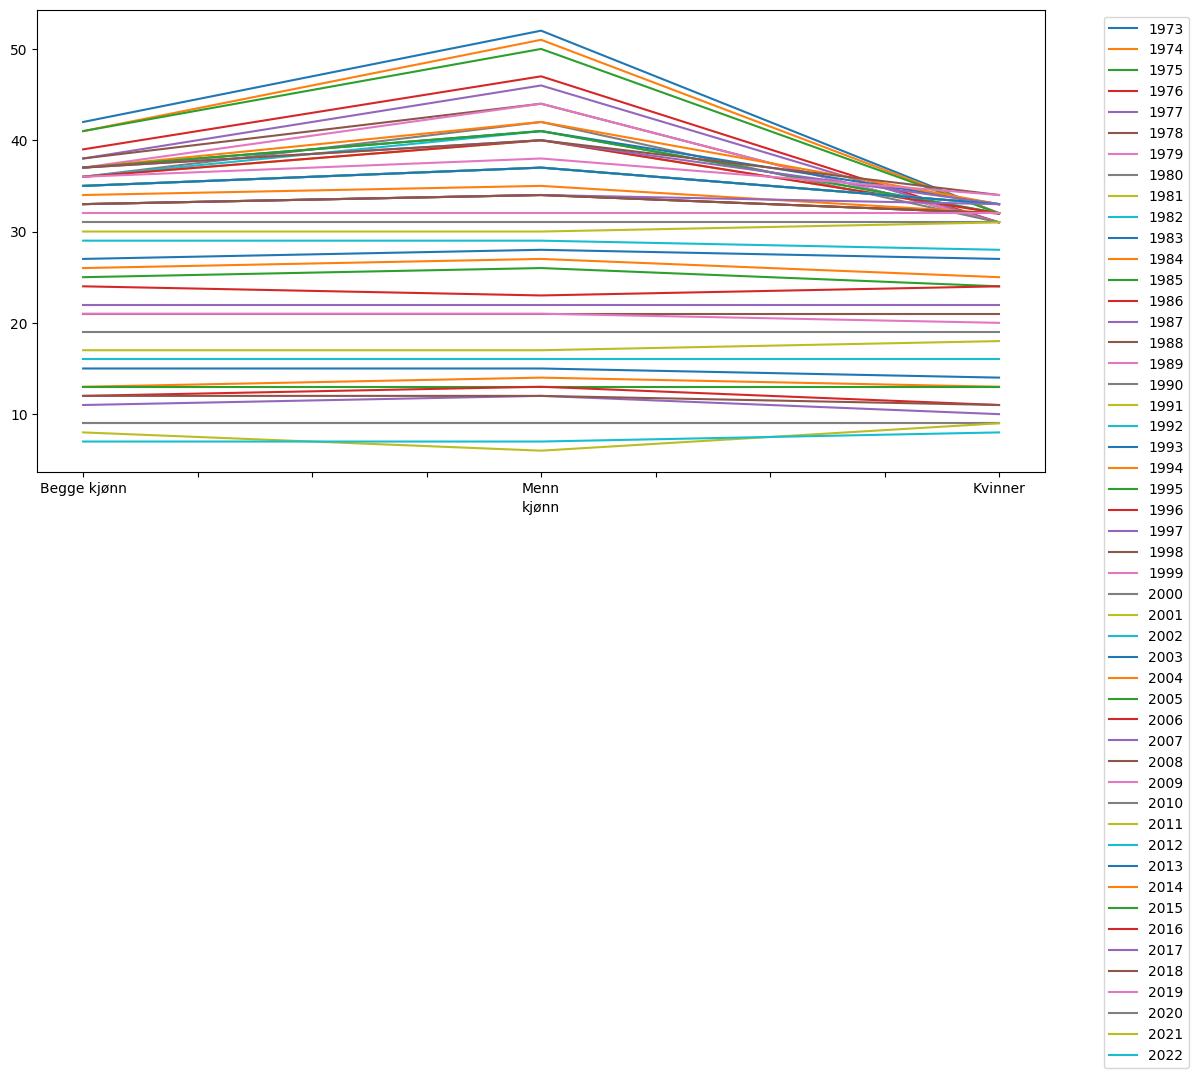

In [174]:
data.plot(figsize=(13,6)).legend(bbox_to_anchor = (1.15,1)) #Jeg bruker .legend of bbox_to_anchor for å skifte på hvor boksen til høyre er satt.

> Så jeg bruker data.transpose() for å bytte x og y-aksen. 
>
> Også ber jeg til gud at dette er det som hjelper meg.

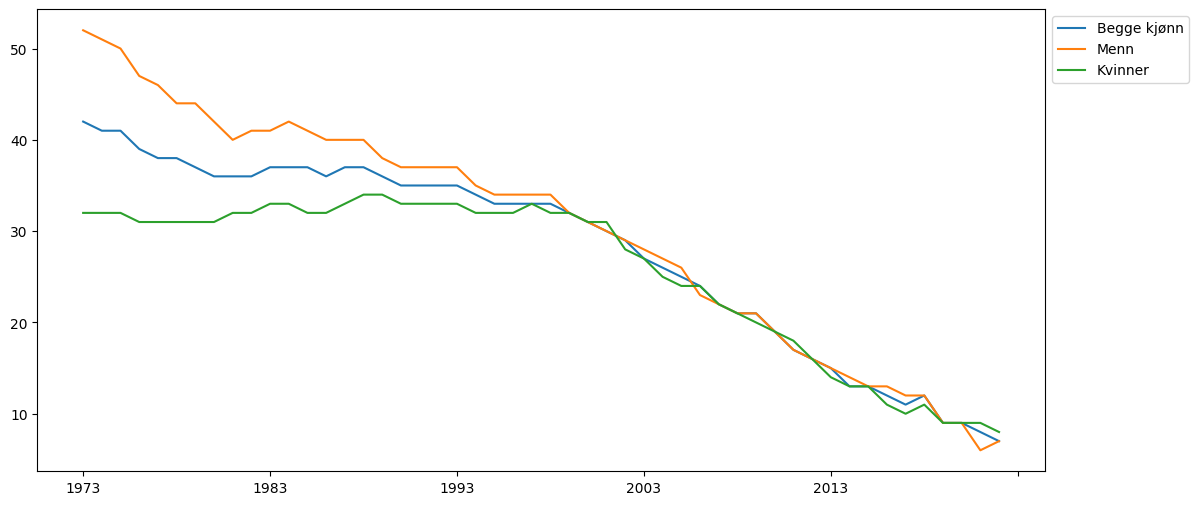

In [175]:
data = data.transpose()
data.plot(figsize=(13,6)).legend(bbox_to_anchor = (1.15,1))

> **Aureka**. Det fungerte. Nå kan vi se menn, kvinner og begge kjønn har hver sin linje.
> 
> Jeg bryr meg spesielt ikke om begge kjønn raden, så vi kan fjerne den med .pop() også skrive raden vi vil fjerne.

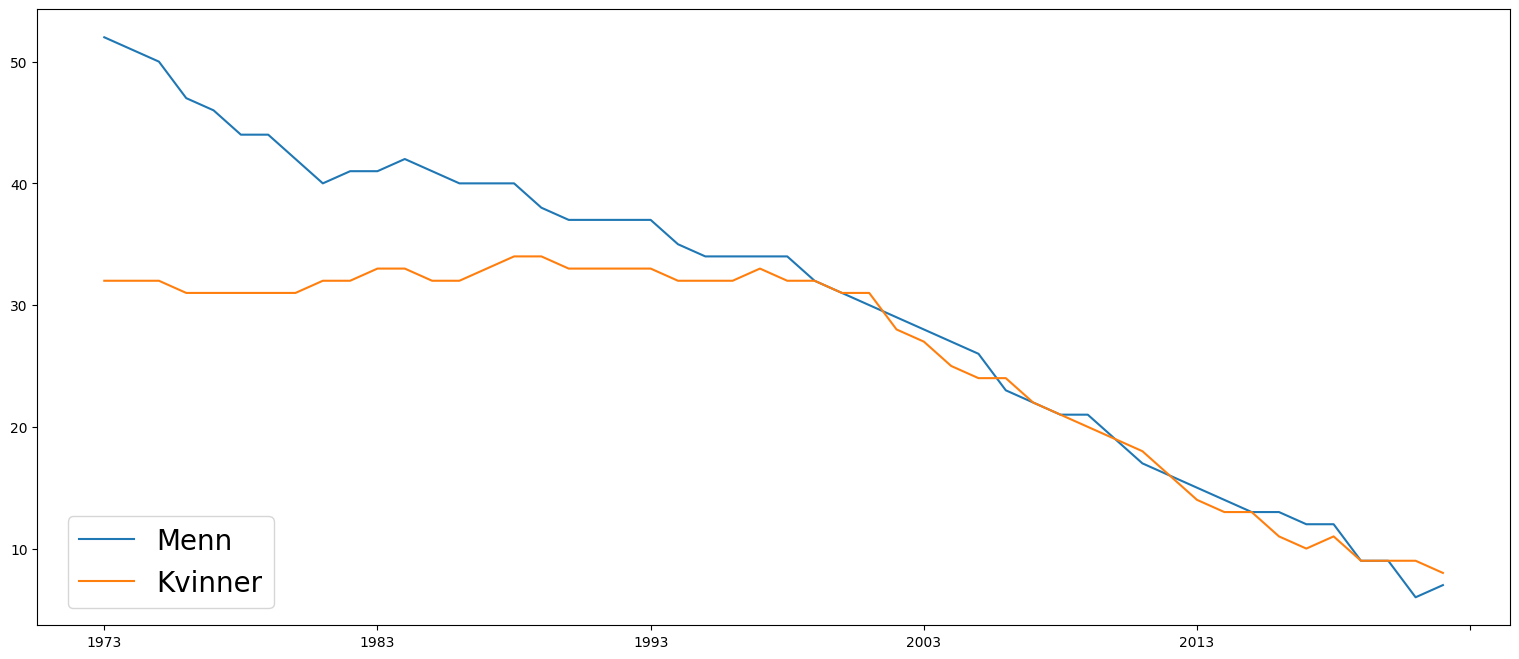

In [176]:
data.pop('Begge kjønn')
data.plot(figsize=(19,8)).legend(bbox_to_anchor = (0.17,0.2), fontsize = 20)

> Det er litt vansklig å se hvor mange prosent de er, ihvertfall i de nyeste årene.
>
> Så jeg bruker axhline for å lage linjer.

Text(0.5, 1.0, 'Andel folk som røyker fra 1973-2022')

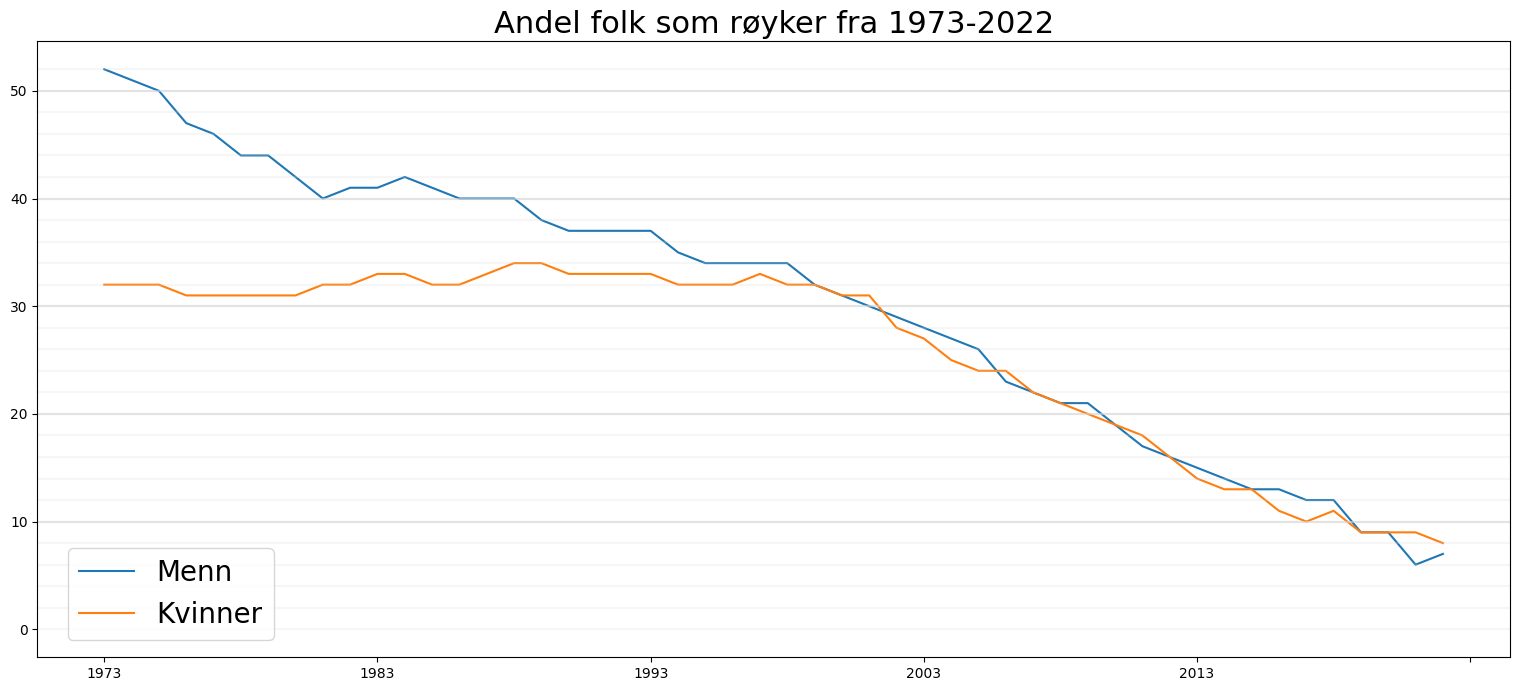

In [177]:
axData = data.plot(figsize=(19,8)) # gjør ax til dataen

i = 0
while i < 54:
    if i == 10 or i == 20 or i == 30 or i == 40 or i == 50: # Når vi er på 10, 20, 30, 40 og 50 lager vi litt sterkere strek
        axData.axhline(y = i, color = "lightgrey", alpha = 0.5)
    axData.axhline(y = i, color = "lightgrey", alpha = 0.2)
    i += 2
    
plt.legend(bbox_to_anchor = (0.17,0.2), fontsize = 20) # legger til reglene for boksen
plt.title("Andel folk som røyker fra 1973-2022", fontdict={'fontsize': 22}) # gir grafen en tittel

> <p style='font-size:22px'>Dette her blir gode saker.</p>

---
## Første halvdel
> Jeg ser at det er splittet på mengden kvinner og menn som røyker fra 1973 til omtrent 1997. Så jeg bruker iloc for å bare plotte fra starten til halvparten.

Text(0.5, 1.0, 'Andel folk som røyker fra 1973-1997')

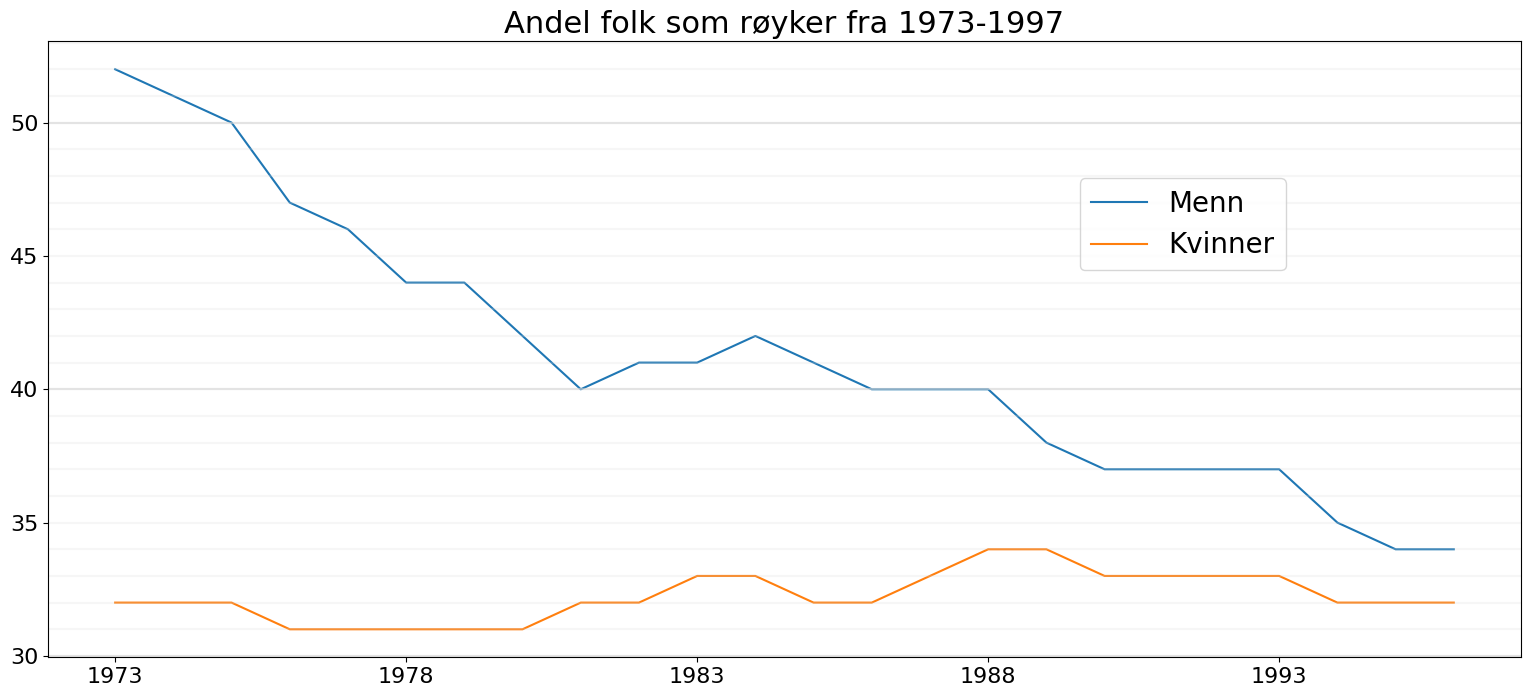

In [178]:
axData = data.iloc[0:24].plot(figsize=(19,8), fontsize=16)

i = 30
while i < 54:
    if i == 30 or i == 40 or i == 50: # Når vi er på 10, 20, 30, 40 og 50 lager vi litt sterkere strek
        axData.axhline(y = i, color = "lightgrey", alpha = 0.5)
    axData.axhline(y = i, color = "lightgrey", alpha = 0.2)
    i += 1
    
    
plt.legend(bbox_to_anchor = (0.85,0.8), fontsize = 20)# legger til reglene for boksen
plt.title("Andel folk som røyker fra 1973-1997", fontdict={'fontsize': 22})

#### Denne forskjellen kan være fordi ferre kvinner jobbet, og det var mer sosialt akeptabelt å røyke på arbeidsplasser, eller røyke på grunn av stress fra jobben.

#### Når flere damer startet å jobbe kan det også bety at flere kvinner startet å røyke, som kan forklare den lille økningen.

#### Synkingen for menn linjen kan være fordi de ser andre menn som røyker stoppe på grunn av helseproblemer fra sigaretter

---
## Andre halvdel

Text(0.5, 1.0, 'Andel folk som røyker fra 1997-2022')

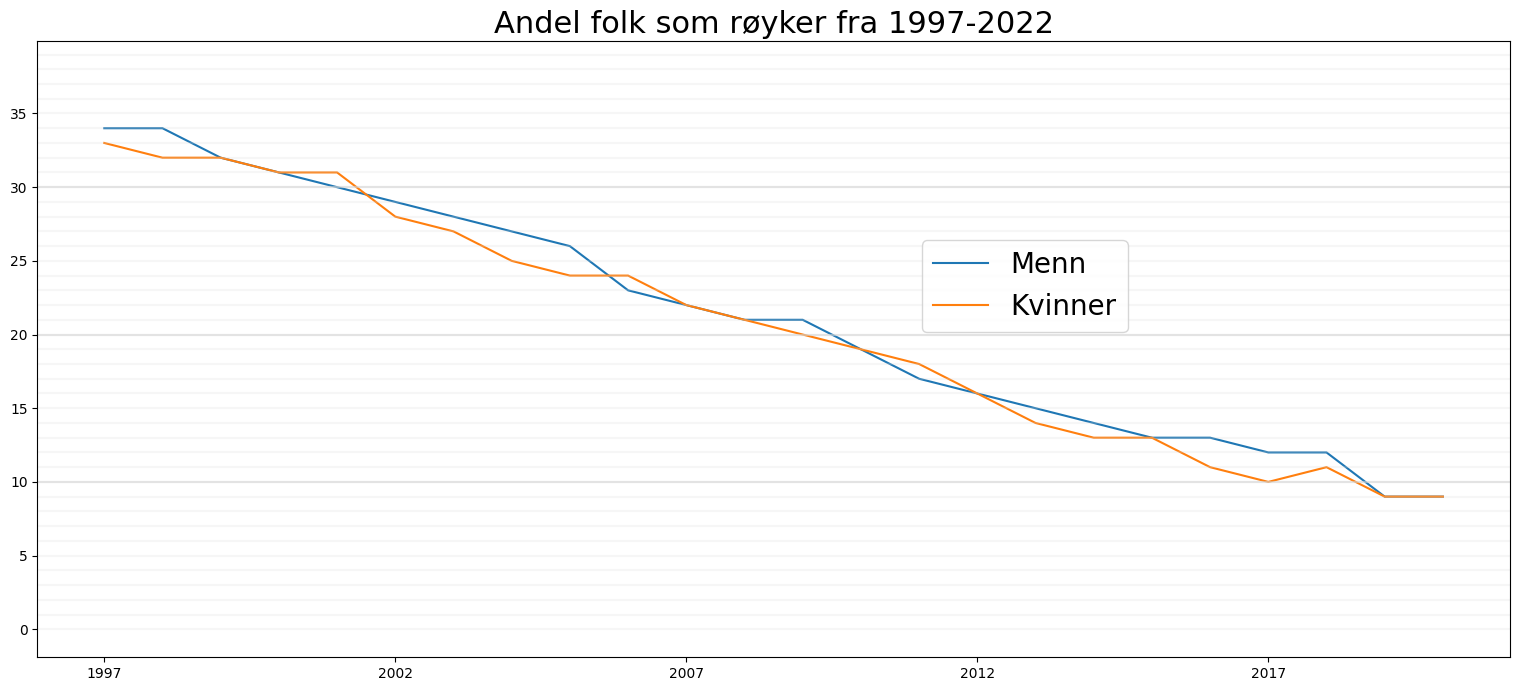

In [179]:
axData = data.iloc[24:48].plot(figsize=(19,8))

i = 0
while i < 40:
    if i == 10 or i == 20 or i == 30 or i == 40: 
        axData.axhline(y = i, color = "lightgrey", alpha = 0.5)
    axData.axhline(y = i, color = "lightgrey", alpha = 0.2)
    i += 1
    
plt.legend(bbox_to_anchor = (0.75, 0.7), fontsize = 20)# legger til reglene for boksen
plt.title("Andel folk som røyker fra 1997-2022", fontdict={'fontsize': 22})

#### Her kan vi se at både kvinner og menn synker jevnt ned fra omtrent 45% til litt under 9%

#### Dette kan være på grunn av mer informasjon som blir spredd ut om farene av røyking, reklame mot røyking og at det ikke er lov å reklamere lengre for røyking.

#### Men jeg har en tanke at mesteparten av dagligrøykerne ikke klarer å slutte "cold turkey", og kanskje begynner med noen andre nikotin produkter. F.eks __**snus**__

---

## Snus

#### Dette datasetter er om andel dagligrøykere. Akkurat samme som røykingen, men bare snus.

In [180]:
snusData = pd.read_csv("dagligsnusere.csv", skiprows = (0,1), index_col = 1, sep = ";", na_values = [".", ".."], encoding = "latin-1")

snusData.pop('statistikkvariabel')

snusData = snusData.transpose()


In [181]:
snusData.pop('Begge kjønn')

2005     5
2006     6
2007     6
2008     6
2009     6
2010     7
2011     8
2012     9
2013     9
2014     9
2015    10
2016    10
2017    12
2018    12
2019    14
2020    13
2021    15
2022    15
Name: Begge kjønn, dtype: int64

Text(0.5, 1.0, 'Andel folk som snuser fra 2005-2022')

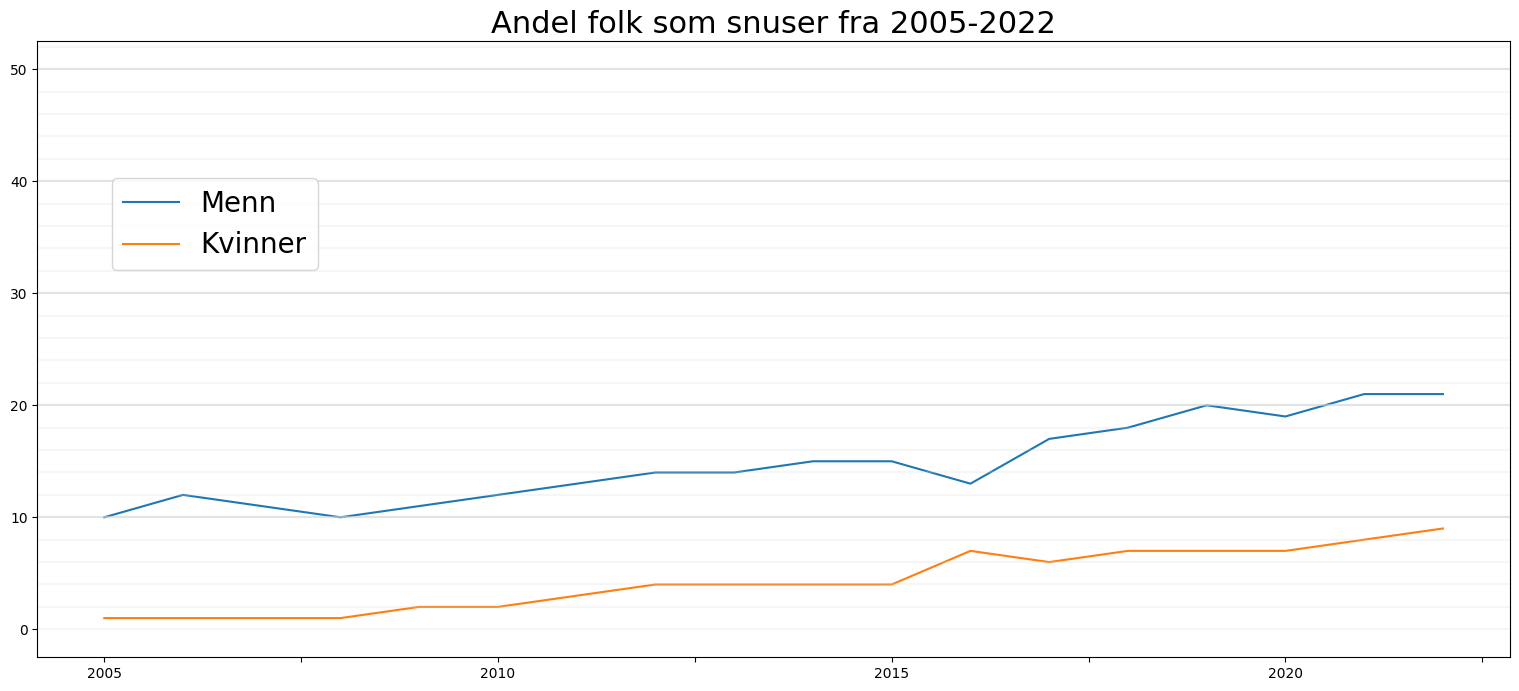

In [182]:
axSnusData = snusData.plot(figsize=(19,8))

i = 0
while i <= 52:
    if i == 10 or i == 20 or i == 30 or i == 40 or i == 50: # Når vi er på 10, 20, 30, 40 og 50 lager vi litt sterkere strek
        axSnusData.axhline(y = i, color = "lightgrey", alpha = 0.5)
    axSnusData.axhline(y = i, color = "lightgrey", alpha = 0.2)
    i += 2
    
plt.legend(bbox_to_anchor = (0.2,0.8), fontsize = 20) # legger til reglene for boksen
plt.title("Andel folk som snuser fra 2005-2022", fontdict={'fontsize': 22}) # gir grafen en tittel

#### Her har vi en plot for dagligsnusing. Grafen viser at omtrent 10% flere menn og kvinner snuser mer idag enn i 2005.

---

## Konklusjon
#### Vi kan se at røyking har stadig senket seg siden 1997, grunnen til splittelse i årene før kan være på grunn av at menn var ute og jobb, men dette er bare en hypotese jeg har lagd basert på en raport som du finner i kilder.

#### __*Hvis vi tenker på spørsmålet jeg spurte på starten.*__ Ja. Folk røyker mindre i dag, kanskje en del av de sluttet helt med rusmiddel, og kanskje noen flyttet til andre nikotinrelaterte produkter. En av disse produktene kan være snus.

---
## Kilder
- <a href='https://tidsskriftet.no/en/2009/09/tobacco-consumption-among-men-and-women-1927-2007#literature'>Tobacco consumption among men and women 1927 – 2007</a>